In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.power import ttest_power
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline

In [2]:
golf_df=pd.read_excel('SM4-Golf.xls')

In [3]:
# Data Exploration 
golf_df.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [4]:
golf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


In [5]:
golf_df.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


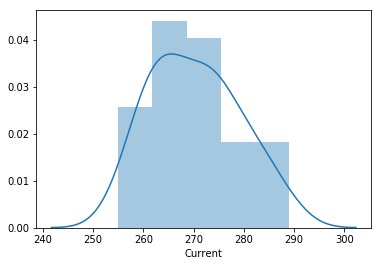

In [6]:
sns.distplot(golf_df['Current'])

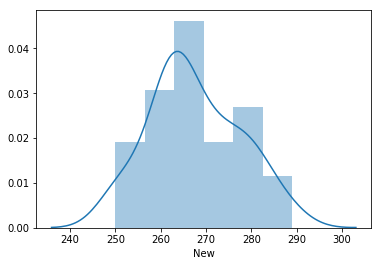

In [7]:
sns.distplot(golf_df['New'])

In [8]:
# check for normality
def check_normality(pGolfball,pSampleDf):
    pStat, pSample=stats.shapiro(pSampleDf)
    alpha=0.05
    if pSample>alpha:
        print('Statistics for %s=%.3f \n\np-Value for %s=%.3f \n\nSample of %s is normally distributed' %(pGolfball,pStat,pGolfball,pSample,pGolfball))
    else:
        print('Statistics for %s=%.3f \n\np-Value for %s=%.3f \n\nSample of %s is not normally distributed' %(pGolfball,pStat,pGolfball,pSample,pGolfball))
#stat_current, p_current= shapiro(golf_df['Current'])

# homogeneity of variances
def homogeneity_variances(pGolfballCurrent, pGolfballNew):
    stat_levene, p_levene=stats.levene(pGolfballCurrent, pGolfballNew)
    alpha=0.05
    if p_levene > alpha:
        print('Variance are equal for the groups supplied \n\np-Value (using levene\'s test) calculated as %.3f'%p_levene)
    else:
        print('Variance are not equal for the groups supplied \n\np-Value (using levene\'s test) calculated as %.3f'%p_levene)
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
    t_statistic, p_value = stats.ttest_ind(golf_df['Current'],golf_df['New'])
    if p_value<=alpha:
        print('Reject the Null Hypothesis. In otherwords, There is enough evidence to accept alternative hypothesis')
    else:
        print('Do not reject Null Hypothesis at %i percent level of significance as p-Value > alpha (%.3f > %.3f)' %(alpha*100,p_value,alpha))
        
def sample_power(pGolfballCurrent,pGolfballNew,num_of_obs,pAlpha,pAlt):
    pooled_std_dev=(np.mean(pGolfballCurrent)-np.mean(pGolfballNew))/np.sqrt(((num_of_obs-1)*np.var(pGolfballCurrent)+(num_of_obs-1)*np.var(pGolfballNew))/num_of_obs+num_of_obs-2)
    return(ttest_power(pooled_std_dev,nobs=num_of_obs,alpha=pAlpha,alternative=pAlt))        
        # check for normality
def check_normality(pGolfball,pSampleDf):
    pStat, pSample=stats.shapiro(pSampleDf)
    alpha=0.05
    if pSample>alpha:
        print('Statistics for %s=%.3f \n\np-Value for %s=%.3f \n\nSample of %s is normally distributed' %(pGolfball,pStat,pGolfball,pSample,pGolfball))
    else:
        print('Statistics for %s=%.3f \n\np-Value for %s=%.3f \n\nSample of %s is not normally distributed' %(pGolfball,pStat,pGolfball,pSample,pGolfball))
#stat_current, p_current= shapiro(golf_df['Current'])

# homogeneity of variances
def homogeneity_variances(pGolfballCurrent, pGolfballNew):
    stat_levene, p_levene=stats.levene(pGolfballCurrent, pGolfballNew)
    alpha=0.05
    if p_levene > alpha:
        print('Variance are equal for the groups supplied \n\np-Value (using levene\'s test) calculated as %.3f'%p_levene)
    else:
        print('Variance are not equal for the groups supplied \n\np-Value (using levene\'s test) calculated as %.3f'%p_levene)
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
    t_statistic, p_value = stats.ttest_ind(golf_df['Current'],golf_df['New'])
    if p_value<=alpha:
        print('Reject the Null Hypothesis. In otherwords, There is enough evidence to accept alternative hypothesis')
    else:
        print('Do not reject Null Hypothesis at %i percent level of significance as p-Value > alpha (%.3f > %.3f)' %(alpha*100,p_value,alpha))
        
def sample_power(pGolfballCurrent,pGolfballNew,num_of_obs,pAlpha,pAlt):
    pooled_std_dev=(np.mean(pGolfballCurrent)-np.mean(pGolfballNew))/np.sqrt(((num_of_obs-1)*np.var(pGolfballCurrent)+(num_of_obs-1)*np.var(pGolfballNew))/num_of_obs+num_of_obs-2)
    return(ttest_power(pooled_std_dev,nobs=num_of_obs,alpha=pAlpha,alternative=pAlt))        
        

In [10]:
# check for normality of the driving distance samples provided for current
check_normality('Current Golfball',golf_df['Current'])

Statistics for Current Golfball=0.971 

p-Value for Current Golfball=0.379 

Sample of Current Golfball is normally distributed


In [11]:
# check for normality of the driving distance samples provided for newball
check_normality('New Golfball',golf_df['New'])

Statistics for New Golfball=0.968 

p-Value for New Golfball=0.306 

Sample of New Golfball is normally distributed


In [12]:
print('From above results we can confirm that the samples provided for Current & New Golf ball are normally distributed')

From above results we can confirm that the samples provided for Current & New Golf ball are normally distributed


In [13]:
homogeneity_variances(golf_df['Current'],golf_df['New'])

Variance are equal for the groups supplied 

p-Value (using levene's test) calculated as 0.615


In [14]:
#Calculate Test Statistic
independent_ttest (golf_df['Current'],golf_df['New'],0.05)

Do not reject Null Hypothesis at 5 percent level of significance as p-Value > alpha (0.188 > 0.050)


In [15]:
print('There is not enough evidence at 5% level of significance to suggest that the driving distance average \nof new golf ball is different from current golf ball')

There is not enough evidence at 5% level of significance to suggest that the driving distance average 
of new golf ball is different from current golf ball


In [16]:
power_of_test=sample_power(golf_df['Current'],golf_df['New'],40,0.05,'two-sided')

In [17]:
print ("Power of test %.2f percent"% (power_of_test*100))

Power of test 22.41 percent


In [18]:
print('As noticed above, statistically there is no significant change in the driving distance due to the new coating on \ngolfballs.Based on our observation in the power of test, our recommendation is that the test be carried out with \nlarger sample size to improve the power of test results.')

As noticed above, statistically there is no significant change in the driving distance due to the new coating on 
golfballs.Based on our observation in the power of test, our recommendation is that the test be carried out with 
larger sample size to improve the power of test results.
